# Data Exploration

In this notebook we will be exploring both of our datasets:

 - **bidders** dataset, which is located in train.csv.
 - **bids** dataset, which is located in bids.csv.
 
Let's start with the shortest one: **Bidders**

## Bidders exploratory analysis

### Loading the dataset

Let's start by loading the dataset in a Pandas' dataframse.

**NOTE**: We expect all the relevant files to be located in `../data`.

In [1]:
import pandas as pd

# Change accordingly.
bidders_file_path = "../data/train.csv"

bidders_dataframe = pd.read_csv(bidders_file_path)

sample_size = 10

# Let's start by taking a small sample
bidders_dataframe.sample(n=sample_size)

,bidder_id,payment_account,address,outcome
1220,84560dfb1400fe920a29ca2c728acf1e25eli,c165a3c456b35ac135138f02ce1efa665a1pz,6fc6c3ca58ac5f2d9098e022bb6acf59phg09,0.0
147,3edae72a9d44c43524c0203ce38581d1790xh,6ee9065c7f23516651fe5975fdb46a4ee8u98,c1c47f4178a44b82f49bcb468b0d26d0ag7w5,0.0
319,a74e3962ca26514976056bae3c46d579emz6y,a3d2de7675556553a5f08e4c88d2c228ph81s,75ff8da638ebe844ad5fe1a14e4e6fbawm8ud,0.0
482,584d1d60d357a4ee1fd3b0a6a72de1dc4rodn,a3d2de7675556553a5f08e4c88d2c228ztnjt,a3d2de7675556553a5f08e4c88d2c228qiakd,0.0
1393,64abb8a286b2be97349e8b17abcce6d9rygza,a3d2de7675556553a5f08e4c88d2c22815b7y,f1c490904e66a68a3a03c5be9faa6f44tprqm,0.0
511,b1bc9ff2b98df742affda07c5977c7345dpm5,8d6440f57adbd2563c102f4226c0e014b2wzs,dbc5678b0387bff64d5df269b116806cx8uh8,0.0
266,175a06fdcf622c9455d0a77990b9302dj23ke,ce609704d5feae85f5d4dadb83b93ea34yskz,06d532f2346e5e4b2ba9352cb9a0c412mpruk,0.0
591,e9c8ee7f783723fe8496dd35232d88f2or1r1,a3d2de7675556553a5f08e4c88d2c228yqv23,aea8eeadeb5ded2bb1d1aa1b6f418b591f98q,0.0
1437,031da7aea2d4b75ac8ecba4825bc1318yki1d,a890a785ea280d987880f2131d1ecf24fud63,ce98e45652a0076ea91b91de66b71f32en5jq,0.0
2012,84a769adc98498f52debfe57b93a0789556f4,fbe0ce34d6546ebd9e4c63afc68b085byd2tf,a3d2de7675556553a5f08e4c88d2c228fib6p,0.0


As we can see above, all the relevant fields (besides outcome) are obfuscated. 

This doesn't mean they won't be useful for our model, but surely make things a bit harder to interpret for us.

In [2]:
# Totals
total_bidders = len(bidders_dataframe)
number_of_human_bidders = len(bidders_dataframe[bidders_dataframe['outcome'] == 0.0])
number_of_bot_bidders = total_bidders - number_of_human_bidders

# Proportions
human_bidders_proportion = number_of_human_bidders / total_bidders
bot_bidders_proportion = number_of_bot_bidders / total_bidders

# Statistics
print("Number of total bidders: {}".format(total_bidders))
print("Number of human bidders: {}".format(number_of_human_bidders))
print("Number of bot bidders: {}".format(number_of_bot_bidders))
print("Proportion of human bidders: {:.2%}".format(human_bidders_proportion))
print("Proportion of bot bidders: {:.2%}".format(bot_bidders_proportion))

Number of total bidders: 2013
Number of human bidders: 1910
Number of bot bidders: 103
Proportion of human bidders: 94.88%
Proportion of bot bidders: 5.12%


The first thing we notice is that our dataset is highly unbalanced, where 1910 out of 2013 records represent human bidders (94.88%), whereas only a small percentage (5.12%) of the bidders were flagged as bots (103 out of 2013).

For a better understanding of this situation, let's visualize it:

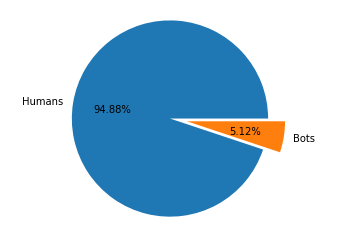

In [3]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()

# Pie chart parameters
pie_data = [number_of_human_bidders, number_of_bot_bidders]
pie_labels = ('Humans', 'Bots')
pie_labels_explode_coefficients = (0, 0.175)

# Show the chart
ax.pie(pie_data, labels=pie_labels, autopct='%1.2f%%', shadow=False, explode=pie_labels_explode_coefficients)
plt.axis('equal')
plt.show()